In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Load listings and calendar datasets
listings_df = pd.read_csv("listings_seattle.csv")
calendar_df = pd.read_csv("calendar_seattle.csv")

## Question 1: What are the busiest times of the year in Seattle for Airbnb bookings?

In [5]:
# Display the first few rows of the dataframe
calendar_df.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [6]:
# Check for missing values
calendar_df.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [7]:
# Check the type of the columns
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [8]:
# Data Cleaning and Preprocessing
# Convert 'date' column to datetime format
calendar_df['date'] = pd.to_datetime(calendar_df['date'])

# Convert 'price' column to numeric after removing the $ sign and commas
calendar_df['price'] = calendar_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Fill missing values in 'price' column with the median price
median_price = calendar_df['price'].median()
calendar_df['price'].fillna(median_price, inplace=True)

# Convert 'available' column to numeric format
calendar_df['available'] = calendar_df['available'].map({'t': 1, 'f': 0})

# Extract month from the 'date' column
calendar_df['month'] = calendar_df['date'].dt.month

# Calculate the average occupancy rate and pricing for each month
monthly_stats = calendar_df.groupby('month').agg({'available': 'mean', 'price': 'mean'}).reset_index()

In [9]:
# Check for missing values after filling
calendar_df.isnull().sum()

listing_id    0
date          0
available     0
price         0
month         0
dtype: int64

In [10]:
# Display the monthly statistics
monthly_stats

,month,available,price
0,1,0.566937,116.887332
1,2,0.662208,119.127761
2,3,0.709187,122.931623
3,4,0.663847,126.324411
4,5,0.675670,129.633747
5,6,0.674384,134.945687
6,7,0.627097,136.024232
7,8,0.645051,135.870647
8,9,0.674402,132.102279
9,10,0.696514,128.524637


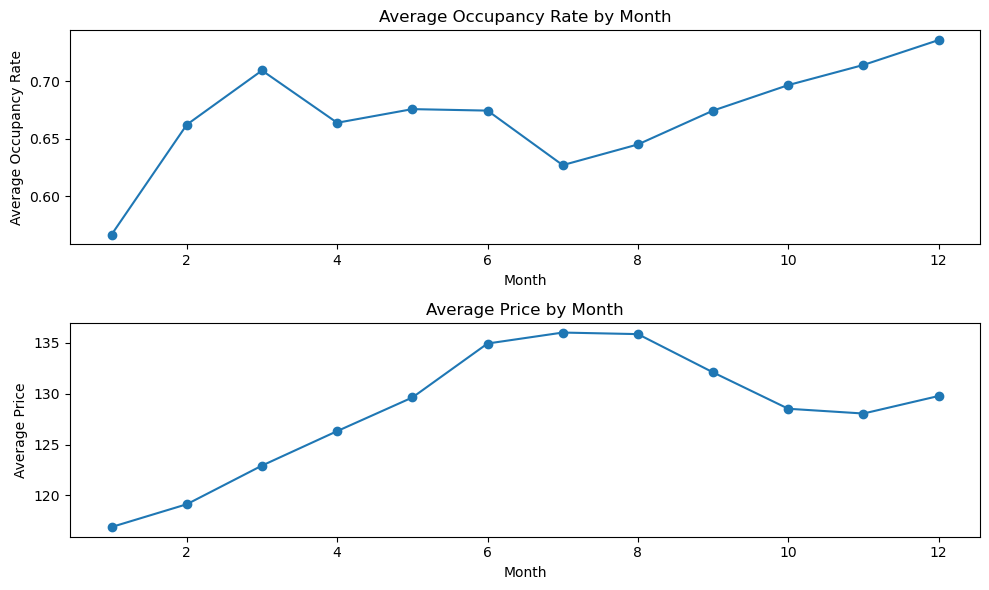

In [11]:
# Plotting
plt.figure(figsize=(10, 6))

# Plot average occupancy rate
plt.subplot(2, 1, 1)
plt.plot(monthly_stats['month'], monthly_stats['available'], marker='o')
plt.title('Average Occupancy Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Occupancy Rate')

# Plot average price
plt.subplot(2, 1, 2)
plt.plot(monthly_stats['month'], monthly_stats['price'], marker='o')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')

# Show plots
plt.tight_layout()
plt.show()

## Question 2: What is the impact of property type and room type on the pricing of Airbnb in Seattle?

In [12]:
# Display the first few rows of the dataframe
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [13]:
# Check for missing values
listings_df.isnull().sum()

id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   627
Length: 92, dtype: int64

In [14]:
# Check data types of all columns
listings_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
                                     ...   
cancellation_policy                  object
require_guest_profile_picture        object
require_guest_phone_verification     object
calculated_host_listings_count        int64
reviews_per_month                   float64
Length: 92, dtype: object

In [15]:
# Data Cleaning and Preprocessing

# # Convert 'price' column to numeric after removing the $ sign and commas
# listings_df11111['price'] = listings_df1['price'].replace({'\$': '', ',': ''}, regex=True)
# # Identify and handle non-numeric values in 'price' column
# non_numeric_prices = listings_df1[~listings_df1['price'].str.replace('.','',1).str.isnumeric()]['price']
# Convert the problematic values to NaN
# listings_df1['price'] = pd.to_numeric(listings_df1['price'], errors='coerce')

# Drop columns with too many missing values or not relevant to price analysis
listings_df1 = listings_df.drop(columns=['id', 'listing_url','host_since', 'scrape_id', 'last_scraped', 'name', 
                                        'summary', 'space', 'description', 'experiences_offered', 
                                        'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 
                                        'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 
                                        'host_url', 'host_name', 'host_location', 'host_about', 
                                        'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 
                                        'host_total_listings_count', 'host_verifications', 
                                        'host_has_profile_pic', 'host_identity_verified', 'street', 
                                        'neighbourhood', 'neighbourhood_cleansed', 'city', 'state', 
                                        'zipcode', 'market', 'smart_location', 'country_code', 'country', 
                                        'is_location_exact', 'calendar_last_scraped', 'requires_license', 
                                        'license', 'jurisdiction_names', 'reviews_per_month'])


# Convert 'price' column to numeric after removing the $ sign and commas
listings_df1['price'] = listings_df1['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


# # Convert 'host_since' column to datetime data type
# listings_df1['host_since'] = pd.to_datetime(listings_df1['host_since'])

# Fill missing values in 'price' column with the median price
median_price = listings_df1['price'].median()
listings_df1['price'].fillna(median_price, inplace=True)

listings_df1['price'] = pd.to_numeric(listings_df1['price'], errors='coerce')

# Fill missing values in 'review_scores_rating' with the median rating
median_rating = listings_df1['review_scores_rating'].median()
listings_df1['review_scores_rating'].fillna(median_rating, inplace=True)

# Columns to fill missing values with the median
columns_to_fill = ['bathrooms', 'bedrooms', 'beds', 'review_scores_accuracy', 'review_scores_cleanliness', 
                    'review_scores_checkin', 'review_scores_communication', 
                    'review_scores_location', 'review_scores_value', 'review_scores_rating']



# Fill missing values with median for each column
for column in columns_to_fill:
    listings_df1[column].fillna(listings_df1[column].median(), inplace=True)

# Fill missing values in 'host_response_time' and 'host_response_rate' with mode and median respectively
mode_response_time = listings_df1['host_response_time'].mode()[0]
median_response_rate = listings_df1['host_response_rate'].replace({'%': ''}, regex=True).astype(float).median()

listings_df1['host_response_time'].fillna(mode_response_time, inplace=True)
listings_df1['host_response_rate'].fillna(median_response_rate, inplace=True)

# Fill missing values in first_review and last_review with a value indicating no reviews available
listings_df1['first_review'].fillna('No reviews available', inplace=True)
listings_df1['last_review'].fillna('No reviews available', inplace=True)

listings_df1['weekly_price'].fillna(0, inplace=True)
listings_df1['monthly_price'].fillna(0, inplace=True)
listings_df1['host_listings_count'].fillna(0, inplace=True)
listings_df1['security_deposit'].fillna(0, inplace=True)
listings_df1['cleaning_fee'].fillna(0, inplace=True)

# Fill missing value in property_type with mode
mode_property_type = listings_df['property_type'].mode()[0]
listings_df1['property_type'].fillna(mode_property_type, inplace=True)

# Fill missing values in square_feet with 0 or a value indicating not available
listings_df1['square_feet'].fillna(0, inplace=True)

# Fill missing values in host_acceptance_rate with a new category indicating missing values
listings_df1['host_acceptance_rate'].fillna('Not provided', inplace=True)

# Fill missing values in host_is_superhost with mode
mode_superhost = listings_df1['host_is_superhost'].mode()[0]
listings_df1['host_is_superhost'].fillna(mode_superhost, inplace=True)

In [16]:
# df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() in ['NaN', 'nan', 'None', '', '-', 'N/A'] else x)
# df

In [17]:
# check nulls after Pre-processing
print(listings_df1.isnull().sum())

host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_is_superhost                   0
host_listings_count                 0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           0
bedrooms                            0
beds                                0
bed_type                            0
amenities                           0
square_feet                         0
price                               0
weekly_price                        0
monthly_price                       0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
calendar_upd

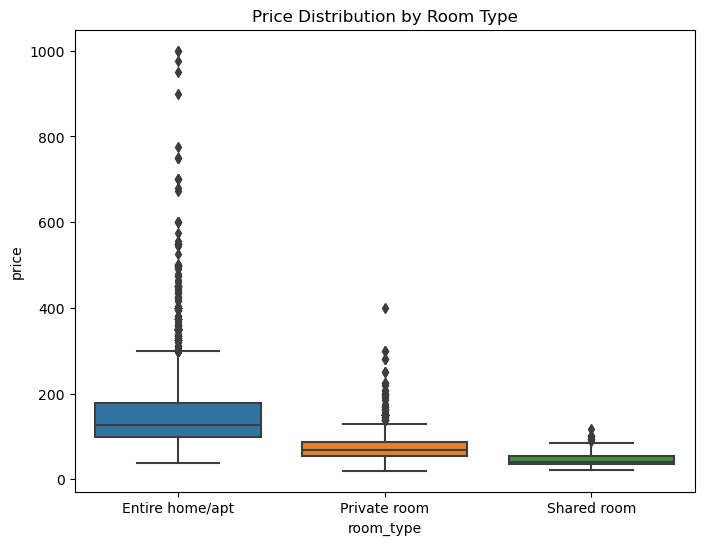

In [19]:
# Box plot of price by room type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='price', data=listings_df1)
plt.title('Price Distribution by Room Type')
plt.show()

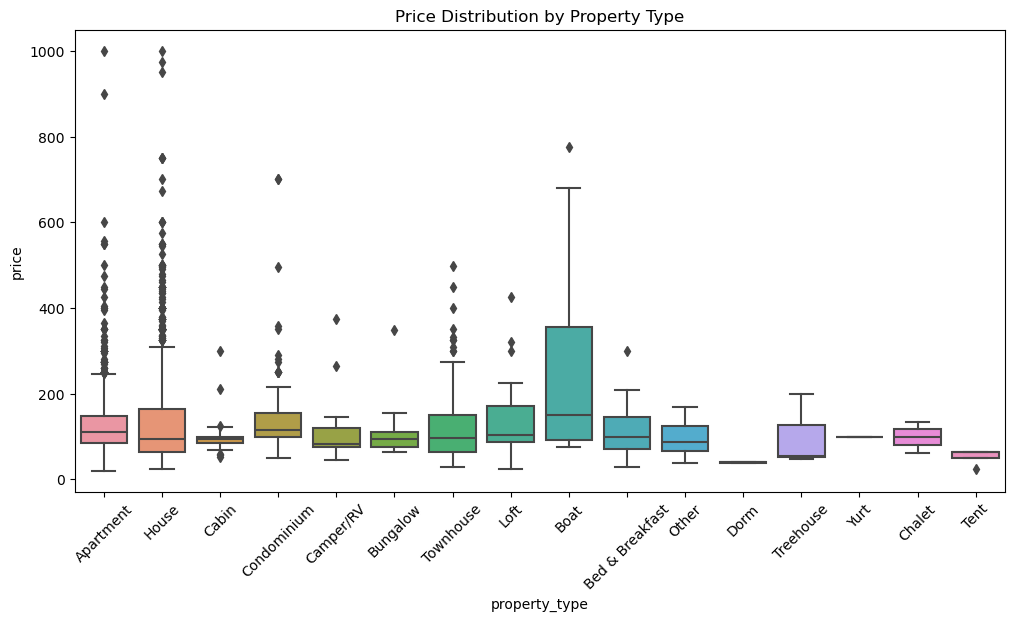

In [20]:
# Box plot of price by property type
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_type', y='price', data=listings_df1)
plt.title('Price Distribution by Property Type')
plt.xticks(rotation=45)
plt.show()

## Question 3: Can we predict the likelihood of a positive review based on listing attributes?

In [21]:
listings_df2 = listings_df.copy()

# Preprocess the 'price' column
listings_df2['price'] = listings_df2['price'].str.replace('$', '').str.replace(',', '').astype(float)

# Handle missing values if any
listings_df2['accommodates'].fillna(listings_df2['accommodates'].mean(), inplace=True)
listings_df2['bedrooms'].fillna(listings_df2['bedrooms'].mean(), inplace=True)
listings_df2['bathrooms'].fillna(listings_df2['bathrooms'].mean(), inplace=True)
listings_df2['price'].fillna(listings_df2['price'].mean(), inplace=True)

In [22]:
# Select relevant features and target variable
selected_features = ['accommodates', 'bedrooms', 'bathrooms', 'price']  # Add more features as needed
X = listings_df2[selected_features]
y = listings_df2['review_scores_rating'] >= 90  # Assuming positive review if review score is >= 90


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_scaled)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


NameError: name 'train_test_split' is not defined

In [ ]:
# Classification report
print(classification_report(y_test, y_pred))

In [ ]:
# Feature importance
if hasattr(model, 'coef_'):
    feature_importance = pd.DataFrame({'Feature': selected_features, 'Importance': model.coef_[0]})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()